In [ ]:
# paper-figures-rich-club-innovation.ipynb
#
# Bryan Daniels
# 7.26.2018 branched from rich-club-innovation.ipynb
# 5.16.2018
#
# Do more innovative papers appear at the periphery of bibliographic networks?

In [1]:
%matplotlib inline
import pylab
import toolbox.defaultFigure as defaultFigure
defaultFigure.setDefaultParams()

In [2]:
import pandas as pd
import numpy as np

In [3]:
from scipy.stats import ks_2samp,binom_test

In [4]:
def degrees(coupling):
    """
    Given coupling dataframe, return series of degrees.
    
    Edges are currently defined as sharing a nonzero number of references.
    (We throw away information about the number of shared references.)
    """
    return (coupling>0).sum(axis=1)

In [5]:
def couplingSum(coupling):
    return coupling.sum(axis=1)

In [6]:
def cdfPlot(allvalues,innovativevalues,samples=100):
    """
    samples (100)         : if given a number of samples,
                            also plot 90% confidence intervals 
                            corresponding to randomly choosing 
                            a subset of allvalues with same
                            length as innovativevalues
    """
    sortedvals = np.sort(allvalues)
    Fvals = (np.array(range(len(sortedvals)))+1)/float(len(sortedvals))

    sortedinnovativevals = np.sort(innovativevalues)
    Finnovativevals = (np.array(range(len(sortedinnovativevals)))+1)/float(len(sortedinnovativevals))
    
    if samples > 0:
        FrandomvalsAllList = []
        for i in range(samples):
            randomindices = np.random.choice(range(len(allvalues)),len(innovativevalues),replace=False)
            #Frandomvals = (np.array(range(len(randomvals)))+1)/float(len(randomvals))
            F = 0.
            FrandomvalsAll = []
            # the y-value for all unobserved points should be equal to the y-value of the closest
            # point with smaller x-value
            for idx in range(len(sortedvals)):
                if idx in randomindices:
                    F += 1./len(randomindices)
                FrandomvalsAll.append(F)
            FrandomvalsAllList.append(FrandomvalsAll)
        defaultFigure.prettyConfInt(pylab.gca(),
               sortedvals,
               np.median(FrandomvalsAllList,axis=0),
               np.percentile(FrandomvalsAllList,5,axis=0),
               np.percentile(FrandomvalsAllList,95,axis=0),color='C0',ls='')    
    
    pylab.plot(sortedvals,Fvals,label='all papers',drawstyle='steps-post')
    pylab.plot(sortedinnovativevals,Finnovativevals,label='innovative papers',drawstyle='steps-post')
    pylab.legend()
    pylab.axis(ymin=0,ymax=1)
    #pylab.ylabel('Cumulative distribution function')
    pylab.ylabel('Cumulative probability') # AKA 'Empirical distribution function'
    pylab.subplots_adjust(bottom=0.15)

# load data

In [15]:
# bibliographic coupling over all years
coupling = pd.read_excel('Data/180426/Bibliographic_Coupling_Matrix.xlsx')

In [16]:
print "There are",len(coupling),"total papers in the corpus."

There are 6456 total papers in the corpus.


(0, 717.1500000000001, 0.698558595985743, 1869.5639957834728)

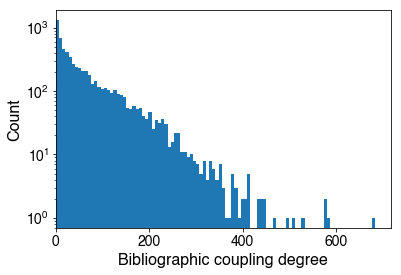

In [12]:
pylab.hist(degrees(coupling),bins=100,log=False);
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Count')
pylab.yscale('log')
pylab.axis(xmin=0)

(0, 1407.0000000000002, 0.6964349002883006, 1993.0075293834566)

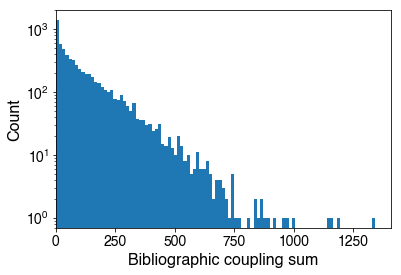

In [245]:
pylab.hist(couplingSum(coupling),bins=100,log=False);
pylab.xlabel('Bibliographic coupling sum')
pylab.ylabel('Count')
pylab.yscale('log')
pylab.axis(xmin=0)

In [13]:
import scipy.stats

expon loc = -2.0985438449140102e-10 , scale = 62.74309614126372 , other params = ()
powerlaw loc = -5.503873156844459e-25 , scale = 814.4324241704057 , other params = (0.3471531810788056,)


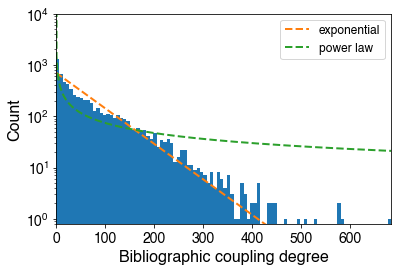

In [73]:
# 8.15.2018 can we say roughly how bibliographic coupling degrees are distributed?

# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

dist_names = [ 'expon', 'powerlaw',  ] # 'lognorm', 'norm', 'gamma', 'beta', 'pareto', 'rayleigh'
full_names = [ 'exponential', 'power law' ]

y = degrees(coupling)
size = len(y)
x = np.arange(size)

bins = 100
h = pylab.hist(y, bins=bins, normed=False, log=False)

if True: # fit continuous distributions
    for dist_name,full_name in zip(dist_names,full_names):
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(y)
        print dist_name, 'loc =', param[-2],', scale =',param[-1],', other params =',param[:-2]
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size * max(y) / bins
        pylab.plot(pdf_fitted, label=full_name, lw=2, ls='--')
    pylab.legend(loc='upper right')
    
#pylab.xscale('log')
pylab.yscale('log')
#pylab.axis(ymin=2e-5,ymax=1e-1,xmin=0,xmax=max(y))
pylab.axis(ymin=8e-1,ymax=1e4,xmin=0,xmax=max(y))

pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Count')
pylab.subplots_adjust(bottom=0.15)
pylab.savefig('180815_bibliographic_coupling_degree_distribution.pdf')

In [14]:
# 6.7.2018 get years for all papers.  
paperData = pd.read_excel('Data/180426/Bibliographic_Coupling_Matrix.xlsx',1)
paperData['Year'] = paperData['Title'].apply(lambda t: int(t[-5:-1]))
paperData.set_index('Name',inplace=True)

In [15]:
paperData.head()

,Title,x-coordinate,y-coordinate,Year
Name,,,,
1,abegglen (2015),-0.0160,-0.1202,2015
2,cohen (2015),-0.0514,-0.1099,2015
3,monument (2014),-0.0954,-0.1114,2014
4,garza (2009),0.0572,0.1993,2009
5,nelson (2015),0.0305,0.1847,2015


In [16]:
# these are the years we've got
years = np.sort(paperData['Year'].unique())
print years

[1971 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1988 1989 1990 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]


In [17]:
# calculate bibiographic coupling to papers published anytime before the same year
couplingByYear = {}
for year in years:
    papers = list( paperData[paperData['Year'] <= year].index )
    couplingByYear[year] = coupling.loc[papers,papers]

In [18]:
# 7.25.2018 also calculate bibiographic coupling to papers published anytime before two (or five) years later
couplingByYearPlus = {}
deltaTime = 5 #2 #2 #5 #2 # years
for year in years:
    papers = list( paperData[paperData['Year'] <= year ].index )
    papersPlus = list( paperData[paperData['Year'] <= year + deltaTime].index )
    couplingByYearPlus[year] = coupling.loc[papers,papersPlus]

In [19]:
couplingByYear[1975]

,5266,5267,5268,5269,5270,5271,5272,5273
5266,NaN,5.0,1.0,NaN,4.0,3.0,NaN,NaN
5267,5.0,NaN,1.0,NaN,2.0,5.0,NaN,NaN
5268,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN
5269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5270,4.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN
5271,3.0,5.0,1.0,NaN,2.0,NaN,NaN,NaN
5272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5273,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [20]:
couplingByYearPlus[1975]

,2297,5257,5258,5259,5260,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273
5266,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,5.0,1.0,NaN,4.0,3.0,NaN,NaN
5267,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0,5.0,NaN,1.0,NaN,2.0,5.0,NaN,NaN
5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN
5269,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5270,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN
5271,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,7.0,3.0,5.0,1.0,NaN,2.0,NaN,NaN,NaN
5272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5273,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [21]:
# example calculating the number of additional bibliographic coupling links gained
# by each paper published in 1975 in the two subsequent years
couplingByYearPlus[1975].sum(axis=1) - couplingByYear[1975].sum(axis=1)

5266     7.0
5267     9.0
5268     1.0
5269     5.0
5270     7.0
5271    11.0
5272     0.0
5273     5.0
dtype: float64

# 5.31.2018 check where Deryc's 100 "innovative" papers fall

In [166]:
# # 50 innovative papers
# #innovativeIDs = np.loadtxt('Data/180531/PaperIDs.txt',skiprows=1,dtype=int)
# # 50 innovative papers that occur post-2006
# rawdata = np.loadtxt('Data/180612/PaperIDs_post2006.txt',skiprows=1,dtype=str,delimiter=',')
# rawdata = filter(lambda row: row != 'New',rawdata)
# rawdata = [ row.split() for row in rawdata ]
# innovativeIDs50 = np.array([row[0] for row in rawdata],dtype=int)
# innovativeNames50 = [row[1]+" "+row[2] for row in rawdata]

In [22]:
# 7.25.2018
# 100 innovative papers
#innovative100raw = pd.read_csv('Data/180621/InnovativePapers_Top100_Post2006.csv')
innovative100raw = pd.read_csv('Data/180808/InnovativePapers_Top100_Post2006-editedBCD.csv')
innovativeIDs100 = np.array(innovative100raw['ID numbers'])
innovativeNames100 = innovative100raw['First Author']
innovativeYears100 = innovative100raw['Year']

In [23]:
# choose the list of innovative papers to use
innovativeIDs = innovativeIDs100 # innovativeIDs50
innovativeNames = innovativeNames100 # innovativeNames50

In [24]:
innovativeIDsByYear = {}
innovativeNamesByYear = {}
for year in years:
    innovativeIDsByYear[year] = filter(lambda id: paperData['Year'][id] == year,innovativeIDs)
    innovativeIndices = filter(lambda idx: paperData['Year'][innovativeIDs[idx]] == year,range(len(innovativeIDs)))
    innovativeNamesByYear[year] = [ innovativeNames[idx] for idx in innovativeIndices ]

# double-check we have all of them
assert(len(innovativeIDs) == np.sum([len(ids) for ids in innovativeIDsByYear.values()]))

In [25]:
len(innovativeIDs)

100

In [26]:
innovativeNamesByYear[2007][:5]

['thompson', 'thompson', 'martin', 'martin', 'martin']

In [27]:
paperData.loc[innovativeIDsByYear[2007]].head()

,Title,x-coordinate,y-coordinate,Year
Name,,,,
424,thompson (2007),-0.3446,-0.0862,2007
1493,thompson (2007),-0.2264,0.2531,2007
4086,martin (2007),3.6420,2.2837,2007
4087,martin (2007),-0.3149,-0.1601,2007
4088,martin (2007),-0.2475,0.0489,2007


In [28]:
# 8.8.2018 check that names match for innovative papers
for idx,name,year in zip(innovativeIDs100,innovativeNames100,innovativeYears100):
    xlsxName = paperData.loc[idx].Title
    if not xlsxName.startswith(name):
        print "ID =",idx
        print "CSV: ", name, "("+str(year)+")"
        print "XLSX:", xlsxName
        print

ID = 3505
CSV:  eiazguirre (2012)
XLSX: eizaguirre (2012)

ID = 2810
CSV:  harrell (2011)
XLSX: jarrell (2010)

ID = 2765
CSV:  mcnamme (2012)
XLSX: mcnamee (2012)

ID = 2058
CSV:  hausler (2007)
XLSX: haeusler (2007)

ID = 399
CSV:  crepi (2011)
XLSX: crespi (2011)



# 6.7.2018 calculate coupling networks separately by year

In [30]:
minYearInnovative,maxYearInnovative = 2007,2014

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


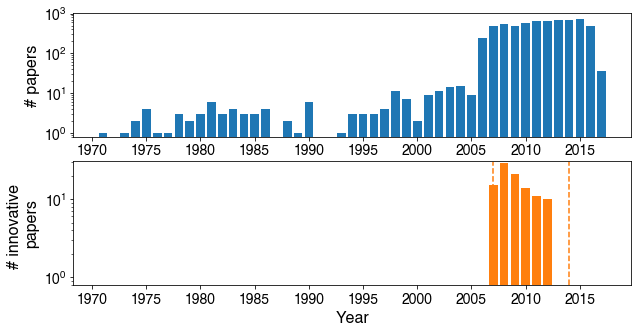

In [87]:
pylab.figure(figsize=(10,5))
years = np.sort(innovativeIDsByYear.keys())
pylab.subplot(211)
baroffset = 0.02 # to make centered on year ticks
ymin = 0.8
pylab.bar(years + baroffset,[len(couplingByYear[y][paperData['Year']==y]) for y in years])
pylab.yscale('log')
#pylab.xlabel('Year')
pylab.ylabel('# papers')
pylab.xticks(range(1970,2017,5))
pylab.axis(ymin=ymin)
pylab.subplot(212)
pylab.bar(years + baroffset,[len(innovativeIDsByYear[y]) for y in years],color='C1')
pylab.yscale('log')
pylab.xlabel('Year')
pylab.ylabel('# innovative \npapers')
pylab.xticks(range(1970,2017,5))
pylab.axis(ymin=ymin)
for year in [minYearInnovative,maxYearInnovative]:
    pylab.plot([year,year],[ymin,30],ls='--',color='C1')
pylab.savefig('180808_num_papers_vs_time_numInnovative'+str(len(innovativeIDs))+'.pdf')

In [31]:
# find innovative paper IDs that fall outside our selected years
print "innovative paper IDs that fall outside our selected years:"
for year in innovativeIDsByYear.keys():
    if year < minYearInnovative or year > maxYearInnovative:
        if len(innovativeIDsByYear[year]) > 0:
            #print year, innovativeIDsByYear[year]
            for idx in innovativeIDsByYear[year]:
                print "year =",year,", ID =",idx,", Title =",paperData.loc[idx].Title

innovative paper IDs that fall outside our selected years:


In [32]:
# gather data for bibliographic degree cdf plot
makeIndividualYearPlots = False
useWeightedEdges = False #True #False #True #False
aggregatedNewdegrees = []
aggregatedInnovativedegrees = []
if useWeightedEdges:
    xlabel = 'Bibliographic coupling sum (at year of publication)'
else:
    xlabel = 'Bibliographic degree (at year of publication)'
#for year in [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]:
for year in [2007,2008,2009,2010,2011,2012,2013,2014]:
    if useWeightedEdges:
        allnewdegrees = couplingSum(couplingByYear[year])[paperData['Year']==year]
    else:
        allnewdegrees = degrees(couplingByYear[year])[paperData['Year']==year]
    print year,"number of new papers =",len(allnewdegrees)
    innovativedegrees = allnewdegrees[innovativeIDsByYear[year]].dropna()
    aggregatedNewdegrees.extend(allnewdegrees)
    aggregatedInnovativedegrees.extend(innovativedegrees)
    if len(innovativedegrees)>1 and makeIndividualYearPlots:
        pylab.figure()
        cdfPlot(allnewdegrees,innovativedegrees)
        pylab.title(year)
        pylab.xlabel(xlabel)
    print year,"number of innovative papers =",len(innovativedegrees)

2007 number of new papers = 494
2007 number of innovative papers = 15
2008 number of new papers = 563
2008 number of innovative papers = 29
2009 number of new papers = 494
2009 number of innovative papers = 21
2010 number of new papers = 570
2010 number of innovative papers = 14
2011 number of new papers = 640
2011 number of innovative papers = 11
2012 number of new papers = 653
2012 number of innovative papers = 10
2013 number of new papers = 682
2013 number of innovative papers = 0
2014 number of new papers = 698
2014 number of innovative papers = 0


In [34]:
print "The total number of papers between",minYearInnovative,"and",maxYearInnovative,"is",len(aggregatedNewdegrees)

The total number of papers between 2007 and 2014 is 4794


In [35]:
# test significance with 2 sample ks-test
print "useWeightedEdges =",useWeightedEdges
print "numInnovative =",len(aggregatedInnovativedegrees)
print ks_2samp(aggregatedNewdegrees,aggregatedInnovativedegrees)

useWeightedEdges = False
numInnovative = 100
Ks_2sampResult(statistic=0.15843554443053814, pvalue=0.012832238259953221)


In [41]:
# test significance with 2 sample ks-test
print "useWeightedEdges =",useWeightedEdges
print "numInnovative =",len(aggregatedInnovativedegrees)
print ks_2samp(aggregatedNewdegrees,aggregatedInnovativedegrees)

useWeightedEdges = True
numInnovative = 100
Ks_2sampResult(statistic=0.13335836462244474, pvalue=0.055909995527797296)


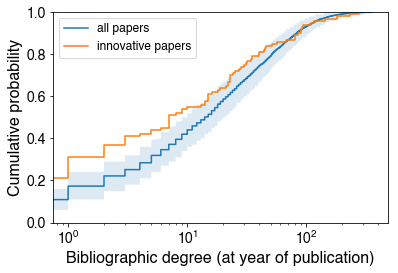

In [37]:
# make bibliographic degree plot
cdfPlot(aggregatedNewdegrees,aggregatedInnovativedegrees,samples=1000)
pylab.xlabel(xlabel)
pylab.xscale('log')
pylab.legend(loc=2)
if useWeightedEdges:
    pylab.savefig('180808_cdf_bibliographic_coupling_sum_at_publication_numInnovative'\
                  +str(len(aggregatedInnovativedegrees))+'.pdf')
else:
    pylab.savefig('180926_cdf_bibliographic_degree_at_publication_numInnovative'\
                  +str(len(aggregatedInnovativedegrees))+'.pdf')

In [223]:
# 7.25.2018 distributions of "delta" coupling (number of new bibliographic coupling links)
makeIndividualYearPlots = False
useWeightedEdges = False #True #False #True #False
aggregatedNewIDs = []
aggregatedInnovativeIDs = []
aggregatedNewdegreesPlus = []
aggregatedInnovativedegreesPlus = []
aggregatedNewdegreesDelta = []
aggregatedInnovativedegreesDelta = []
if useWeightedEdges:
    xlabel = 'Delta Bibliographic coupling sum ($\\Delta=$'+str(deltaTime)+' years)'
else:
    xlabel = 'Delta Bibliographic degree ($\\Delta=$'+str(deltaTime)+' years)'
for year in [2007,2008,2009,2010,2011,2012,2013,2014]:
    newPaperIDs = list(paperData[paperData['Year']==year].index)
    if useWeightedEdges:
        allnewdegrees = couplingSum(couplingByYear[year])[newPaperIDs] #[paperData['Year']==year]
        allnewdegreesPlus = couplingSum(couplingByYearPlus[year])[newPaperIDs] #[paperData['Year']==year]
    else:
        allnewdegrees = degrees(couplingByYear[year])[paperData['Year']==year]
        allnewdegreesPlus = degrees(couplingByYearPlus[year])[paperData['Year']==year]
    allnewdegreesDelta = allnewdegreesPlus - allnewdegrees
    print year,"number of new papers =",len(allnewdegrees)
    innovativedegreesPlus = allnewdegreesPlus[innovativeIDsByYear[year]].dropna()
    innovativedegreesDelta = allnewdegreesDelta[innovativeIDsByYear[year]].dropna()
    aggregatedNewIDs.extend(newPaperIDs)
    aggregatedNewdegreesDelta.extend(allnewdegreesDelta)
    aggregatedNewdegreesPlus.extend(aggregatedNewdegreesPlus)
    aggregatedInnovativeIDs.extend(innovativeIDsByYear[year])
    aggregatedInnovativedegreesDelta.extend(innovativedegreesDelta)
    aggregatedInnovativedegreesPlus.extend(innovativedegreesPlus)
    if len(innovativedegreesDelta)>1:
        if makeIndividualYearPlots:
            pylab.figure()
            cdfPlot(allnewdegreesDelta,innovativedegreesDelta)
            pylab.title(year)
            pylab.xlabel(xlabel)
    print year,"number of innovative papers =",len(innovativedegreesDelta)

2007 number of new papers = 494
2007 number of innovative papers = 15
2008 number of new papers = 563
2008 number of innovative papers = 29
2009 number of new papers = 494
2009 number of innovative papers = 21
2010 number of new papers = 570
2010 number of innovative papers = 14
2011 number of new papers = 640
2011 number of innovative papers = 11
2012 number of new papers = 653
2012 number of innovative papers = 10
2013 number of new papers = 682
2013 number of innovative papers = 0
2014 number of new papers = 698
2014 number of innovative papers = 0


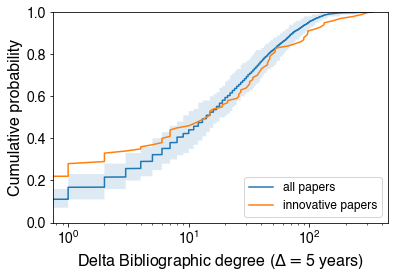

In [225]:
cdfPlot(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)
#pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.xscale('log')
if useWeightedEdges:
    pylab.savefig('180808_delta_'+str(deltaTime)+'years_bibliographic_coupling_sum_numInnovative'\
                  +str(len(aggregatedInnovativedegreesDelta))+'.pdf')
else:
    pylab.savefig('180808_delta_'+str(deltaTime)+'years_bibliographic_degree_numInnovative'\
                  +str(len(aggregatedInnovativedegreesDelta))+'.pdf')

In [99]:
# test significance with 2 sample ks-test
print "useWeightedEdges =",useWeightedEdges
print "deltaTime =",deltaTime,"years"
print "numInnovative =",len(aggregatedInnovativedegrees)
ks_2samp(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)

useWeightedEdges = True
deltaTime = 2 years
numInnovative = 100


Ks_2sampResult(statistic=0.10607008760951189, pvalue=0.20784537452793014)

In [58]:
# test significance with 2 sample ks-test
print "useWeightedEdges =",useWeightedEdges
print "deltaTime =",deltaTime,"years"
print "numInnovative =",len(aggregatedInnovativedegrees)
ks_2samp(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)

useWeightedEdges = True
deltaTime = 5 years
numInnovative = 100


Ks_2sampResult(statistic=0.11231539424280351, pvalue=0.1580793270412866)

In [92]:
print "useWeightedEdges =",useWeightedEdges
print "deltaTime =",deltaTime,"years"
print "numInnovative =",len(aggregatedInnovativedegrees)
ks_2samp(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)

useWeightedEdges = False
deltaTime = 2 years
numInnovative = 100


Ks_2sampResult(statistic=0.11720901126408007, pvalue=0.12614359076503293)

In [82]:
# test significance with 2 sample ks-test
print "useWeightedEdges =",useWeightedEdges
print "deltaTime =",deltaTime,"years"
print "numInnovative =",len(aggregatedInnovativedegrees)
ks_2samp(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)

useWeightedEdges = False
deltaTime = 5 years
numInnovative = 100


Ks_2sampResult(statistic=0.11410513141426784, pvalue=0.1457213607403462)

In [171]:
# (with weighted edges)
bigMoverThreshold = 100 #200 #100
numBigMoversOverall = np.sum(np.array(aggregatedNewdegreesDelta) > bigMoverThreshold)
numBigMoversInnovative = np.sum(np.array(aggregatedInnovativedegreesDelta) > bigMoverThreshold)
numOverall = len(aggregatedNewdegreesDelta)
numInnovative = len(aggregatedInnovativedegreesDelta)
overallFraction = numBigMoversOverall / float(numOverall)
innovativeFraction = numBigMoversInnovative / float(numInnovative)
print "useWeightedEdges =",useWeightedEdges
print "deltaTime =",deltaTime,"years"
print
print "Big mover = gaining >",bigMoverThreshold,"in bibliographic coupling sum in first",deltaTime,"years"
print
print "overallFraction =",overallFraction,"(",numBigMoversOverall,"/",numOverall,")"
print "innovativeFraction =",innovativeFraction,"(",numBigMoversInnovative,"/",numInnovative,")"
print
print "innovativeFraction is larger with p-value",\
    binom_test(numBigMoversInnovative, numInnovative, 
               overallFraction, alternative='greater')

useWeightedEdges = True
deltaTime = 2 years

Big mover = gaining > 100 in bibliographic coupling sum in first 2 years

overallFraction = 0.0425531914893617 ( 204 / 4794 )
innovativeFraction = 0.13 ( 13 / 100 )

innovativeFraction is larger with p-value 0.00033189775437767274


In [172]:
bigDudThreshold = 2
numBigDudsOverall = np.sum(np.array(aggregatedNewdegreesDelta) < bigDudThreshold)
numBigDudsInnovative = np.sum(np.array(aggregatedInnovativedegreesDelta) < bigDudThreshold)
numOverall = len(aggregatedNewdegreesDelta)
numInnovative = len(aggregatedInnovativedegreesDelta)
overallFraction = numBigDudsOverall / float(numOverall)
innovativeFraction = numBigDudsInnovative / float(numInnovative)
print "useWeightedEdges =",useWeightedEdges
print "deltaTime =",deltaTime,"years"
print
print "Big dud = gaining <",bigDudThreshold,"in bibliographic degree in first",deltaTime,"years"
print
print "overallFraction =",overallFraction,"(",numBigDudsOverall,"/",numOverall,")"
print "innovativeFraction =",innovativeFraction,"(",numBigDudsInnovative,"/",numInnovative,")"
print
print "innovativeFraction is larger with p-value",\
    binom_test(numBigDudsInnovative, numInnovative, 
               overallFraction, alternative='greater')

useWeightedEdges = True
deltaTime = 2 years

Big dud = gaining < 2 in bibliographic degree in first 2 years

overallFraction = 0.19774718397997496 ( 948 / 4794 )
innovativeFraction = 0.29 ( 29 / 100 )

innovativeFraction is larger with p-value 0.01731603926985132


In [173]:
# are "big mover" innovative papers just ones that happened to begin
# with large degree?
bigMoversInnovative = np.array(aggregatedInnovativedegreesDelta) > bigMoverThreshold
bigMoversIDs = [ aggregatedInnovativeIDs[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigMoversInnovative[i] ]
bigMoversNames = [ paperData.loc[ID]['Title'] for ID in bigMoversIDs ]
bigMoversInitialDegrees = [ aggregatedInnovativedegrees[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigMoversInnovative[i] ]
bigMoversFinalDegrees = [ aggregatedInnovativedegreesPlus[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigMoversInnovative[i] ]

In [174]:
bigMoversIDs

[4088, 2859, 3277, 5090, 1076, 6331, 5083, 854, 5580, 1107, 1597, 399, 5358]

In [176]:
paperData.loc[2859]

Title           johnson (2008)
x-coordinate           -0.0493
y-coordinate            0.4356
Year                      2008
Name: 2859, dtype: object

In [205]:
couplingByYear[2009][2859].dropna()

2855    39.0
2856    49.0
2857    35.0
2858     1.0
5093     1.0
Name: 2859, dtype: float64

In [209]:
paperData.loc[[2855,2856,2857]]

,Title,x-coordinate,y-coordinate,Year
Name,,,,
2855,johnson (2009),-0.0786,0.4175,2009
2856,johnson (2009),-0.0670,0.3686,2009
2857,johnson (2009),-0.0635,0.4273,2009


In [246]:
couplingSum(couplingByYear[2013])[bigMoversIDs]

4088     346.0
2859     135.0
3277     539.0
5090     365.0
1076     529.0
6331     278.0
5083     645.0
854      519.0
5580     301.0
1107    1025.0
1597     505.0
399      722.0
5358     260.0
dtype: float64

In [175]:
bigMoversNames

[u'martin (2007)',
 u'johnson (2008)',
 u'schulenburg (2009)',
 u'kenrick (2009)',
 u'flatt (2009)',
 u'stearns (2010)',
 u'kenrick (2010)',
 u'nesse (2010)',
 u'hancock (2011)',
 u'flinn (2011)',
 u'low (2011)',
 u'crespi (2011)',
 u'nunn (2012)']

In [104]:
np.sum(bigMoversInnovative)

13

In [105]:
bigMoversInitialDegrees

[35, 2, 90, 45, 80, 91, 110, 181, 116, 276, 80, 232, 94]

In [106]:
np.mean(bigMoversInitialDegrees)

110.15384615384616

In [107]:
bigMoversFinalDegrees

[194.0,
 128.0,
 414.0,
 262.0,
 372.0,
 246.0,
 559.0,
 449.0,
 301.0,
 1025.0,
 505.0,
 722.0,
 336.0]

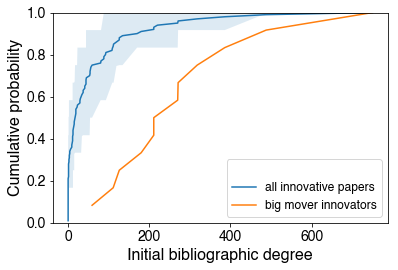

In [67]:
# are "big mover" innovative papers just ones that happened to begin
# with large degree?  Yes...
cdfPlot(aggregatedInnovativedegrees,bigMoversInitialDegrees)
pylab.legend(['','all innovative papers','big mover innovators'])
pylab.xlabel('Initial bibliographic degree')

In [68]:
# what about "big duds"?
bigDudsInnovative = np.array(aggregatedInnovativedegreesDelta) < bigDudThreshold
bigDudsInitialDegrees = [ aggregatedInnovativedegrees[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigDudsInnovative[i] ]
bigDudsFinalDegrees = [ aggregatedInnovativedegreesPlus[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigDudsInnovative[i] ]

In [69]:
np.sum(bigDudsInnovative)

26

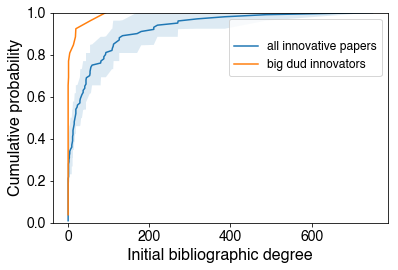

In [70]:
# are "big dud" innovative papers just ones that happened to begin
# with small degree?  Yes...
cdfPlot(aggregatedInnovativedegrees,bigDudsInitialDegrees)
pylab.legend(['','all innovative papers','big dud innovators'])
pylab.xlabel('Initial bibliographic degree')

In [129]:
# 8.8.2018 what is the fate of innovative papers that start in the periphery?
startSmallThreshold = 10 #2 #10 #2
startSmallInnovative = np.array(aggregatedInnovativedegrees) < startSmallThreshold
startSmallDeltaDegrees = [ aggregatedInnovativedegreesDelta[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if startSmallInnovative[i] ]
startSmallInitialDegrees = [ aggregatedInnovativedegrees[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if startSmallInnovative[i] ]
startSmallFinalDegrees = [ aggregatedInnovativedegreesPlus[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if startSmallInnovative[i] ]

# and what if we compare to all papers that start small?
startSmallAll = np.array(aggregatedNewdegrees) < startSmallThreshold
startSmallAllDeltaDegrees = [ aggregatedNewdegreesDelta[i] for i in range(len(aggregatedNewdegrees)) \
                            if startSmallAll[i] ]
# startSmallAllInitialDegrees = [ aggregatedNewdegrees[i] for i in range(len(aggregatedNewdegrees)) \
#                             if startSmallAll[i] ]
# startSmallAllFinalDegrees = [ aggregatedNewdegreesPlus[i] for i in range(len(aggregatedNewdegrees)) \
#                             if startSmallAll[i] ]

In [130]:
np.sum(startSmallInnovative)

54

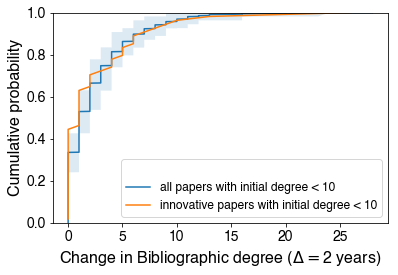

In [131]:
if useWeightedEdges:
    xlabel = 'Change in Bibliographic coupling sum ($\\Delta=$'+str(deltaTime)+' years)'
else:
    xlabel = 'Change in Bibliographic degree ($\\Delta=$'+str(deltaTime)+' years)'
cdfPlot(startSmallAllDeltaDegrees,startSmallDeltaDegrees)
pylab.xlabel(xlabel)
pylab.legend(['','all papers with initial degree < '+str(startSmallThreshold),
              'innovative papers with initial degree < '+str(startSmallThreshold)])

if useWeightedEdges:
    pylab.savefig('180808_delta_'+str(deltaTime)+'years_bibliographic_coupling_sum_startSmallThreshold'+\
                  str(startSmallThreshold)+'.pdf')
else:
    pylab.savefig('180808_delta_'+str(deltaTime)+'years_bibliographic_degree_startSmallThreshold'+\
                  str(startSmallThreshold)+'.pdf')

# now with useWeightedEdges = False

In [226]:
# (without weighted edges)
bigDudThreshold = 2 #2
numBigDudsOverall = np.sum(np.array(aggregatedNewdegreesDelta) < bigDudThreshold)
numBigDudsInnovative = np.sum(np.array(aggregatedInnovativedegreesDelta) < bigDudThreshold)
numOverall = len(aggregatedNewdegreesDelta)
numInnovative = len(aggregatedInnovativedegreesDelta)
overallFraction = numBigDudsOverall / float(numOverall)
innovativeFraction = numBigDudsInnovative / float(numInnovative)
print "useWeightedEdges =",useWeightedEdges
print
print "Big dud = gaining <",bigDudThreshold,"in bibliographic degree in first",deltaTime,"years"
print
print "overallFraction =",overallFraction,"(",numBigDudsOverall,"/",numOverall,")"
print "innovativeFraction =",innovativeFraction,"(",numBigDudsInnovative,"/",numInnovative,")"
print
print "innovativeFraction is larger with p-value",\
    binom_test(numBigDudsInnovative, numInnovative, 
               overallFraction, alternative='greater')

useWeightedEdges = False

Big dud = gaining < 2 in bibliographic degree in first 5 years

overallFraction = 0.16750104297037965 ( 803 / 4794 )
innovativeFraction = 0.28 ( 28 / 100 )

innovativeFraction is larger with p-value 0.0033357942667520133


In [237]:
# (without weighted edges)
bigMoverThreshold = 75 #60 #50
numBigMoversOverall = np.sum(np.array(aggregatedNewdegreesDelta) > bigMoverThreshold)
numBigMoversInnovative = np.sum(np.array(aggregatedInnovativedegreesDelta) > bigMoverThreshold)
numOverall = len(aggregatedNewdegreesDelta)
numInnovative = len(aggregatedInnovativedegreesDelta)
overallFraction = numBigMoversOverall / float(numOverall)
innovativeFraction = numBigMoversInnovative / float(numInnovative)
print "useWeightedEdges =",useWeightedEdges
print
print "Big mover = gaining >",bigMoverThreshold,"in bibliographic degree in first",deltaTime,"years"
print
print "overallFraction =",overallFraction,"(",numBigMoversOverall,"/",numOverall,")"
print "innovativeFraction =",innovativeFraction,"(",numBigMoversInnovative,"/",numInnovative,")"
print
print "innovativeFraction is larger with p-value",\
    binom_test(numBigMoversInnovative, numInnovative, 
               overallFraction, alternative='greater')

useWeightedEdges = False

Big mover = gaining > 75 in bibliographic degree in first 5 years

overallFraction = 0.0917813934084272 ( 440 / 4794 )
innovativeFraction = 0.16 ( 16 / 100 )

innovativeFraction is larger with p-value 0.01994168499391558


In [238]:
# are "big mover" innovative papers just ones that happened to begin
# with large degree?
bigMoversInnovative = np.array(aggregatedInnovativedegreesDelta) > bigMoverThreshold
bigMoversInitialDegrees = [ aggregatedInnovativedegrees[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigMoversInnovative[i] ]
bigMoversFinalDegrees = [ aggregatedInnovativedegreesPlus[i] for i in range(len(aggregatedInnovativedegrees)) \
                            if bigMoversInnovative[i] ]

In [239]:
# now with useWeightedEdges = False
bigMoversInitialDegrees

[21, 35, 68, 90, 45, 80, 91, 110, 181, 116, 142, 85, 276, 80, 232, 94]

In [240]:
# now with useWeightedEdges = False
bigMoversFinalDegrees

[97, 146, 165, 248, 140, 212, 215, 290, 412, 249, 227, 182, 585, 170, 506, 184]

# 5.24.2018 use networkx's version of rich club coefficient

In [7]:
import networkx as nx
from toolbox.simplePickle import load,save
from toolbox.SparsenessTools import zeroDiag

In [20]:
def richClubNodes(degreeList,K):
    return np.where( degreeList >= K )[0]

In [17]:
G = nx.from_numpy_array(np.array(coupling)>0)

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [18]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6456
Number of edges: 202535
Average degree:  62.7432


In [148]:
# takes ~30 minutes ? or load below
rcc = nx.rich_club_coefficient(G)
save(rcc,'180524_bibliographic_coupling_rich_club_coefficients.dat')

{0: 1.0,
 1: 1.0000939050669198,
 2: 1.0002425070277547,
 3: 1.0004960588127327,
 4: 1.0010595591636944,
 5: 1.0017419515847268,
 6: 1.0024892940322057,
 7: 1.003182455769898,
 8: 1.0037613914623988,
 9: 1.0047361401978634,
 10: 1.0057451927978631,
 11: 1.0065530463986403,
 12: 1.0078968922406466,
 13: 1.0089242243745793,
 14: 1.0104399157297512,
 15: 1.011384065453135,
 16: 1.0125194216943616,
 17: 1.0137193910264903,
 18: 1.0149659139326799,
 19: 1.0158557554785386,
 20: 1.0169695076634748,
 21: 1.0184943712783066,
 22: 1.0198597939047014,
 23: 1.0212528766715048,
 24: 1.022853620202267,
 25: 1.024086220960767,
 26: 1.025706810701325,
 27: 1.0274978592613175,
 28: 1.0292354166189899,
 29: 1.0312341465664345,
 30: 1.0334595408836855,
 31: 1.0362966396563964,
 32: 1.038146865135196,
 33: 1.0396752168296732,
 34: 1.0417201925732056,
 35: 1.0441949789172682,
 36: 1.046368229810245,
 37: 1.0480840963038318,
 38: 1.0499626400996263,
 39: 1.0518800062823936,
 40: 1.0531479967293542,
 41: 1.

In [8]:
rcc = load('180524_bibliographic_coupling_rich_club_coefficients.dat')

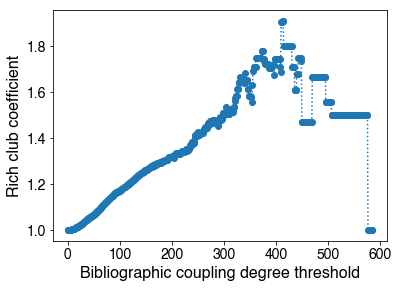

In [44]:
sortedDegrees = np.sort(rcc.keys())
pylab.plot(sortedDegrees,[rcc[d] for d in sortedDegrees],'o:')
pylab.xlabel('Bibliographic coupling degree threshold')
pylab.ylabel('Rich club coefficient')
pylab.subplots_adjust(bottom=0.15,top=0.95)
pylab.savefig('180731_rich_club_coefficient.pdf')

In [9]:
sortedDegrees = np.sort(rcc.keys())
maxindex = np.argmax([rcc[d] for d in sortedDegrees])
print "Maximum rich club coefficient of",rcc[sortedDegrees[maxindex]],"occurs at degree",sortedDegrees[maxindex]

Maximum rich club coefficient of 1.90909090909 occurs at degree 413


In [21]:
len(richClubNodes(degrees(coupling),413))

17

In [22]:
threshold = 300
numRich = len(richClubNodes(degrees(coupling),threshold))
print "The rich club coefficient for a threshold of",threshold,"is",rcc[300],"."
print "This represents a rich club consisting of",numRich,"publications, representing",\
    100.*float(numRich)/len(coupling),"percent of publications in the corpus."

The rich club coefficient for a threshold of 300 is 1.50882079851 .
This represents a rich club consisting of 86 publications, representing 1.33209417596 percent of publications in the corpus.
